**Импорт необходимых библиотек.**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

**Функции ввода параметров из консоли.**

In [3]:
def get_params():
    """
    Получение тестовых значений параметров алгоритма.

    Output:
    -------
    L, K, R : array
        Массивы параметров модели.
    startX : array
        Начальные данные модели.
    n : int
        Количество шагов.
    """
    L = np.array([3.0, 4.0, 5.0], dtype=int)
    K = np.array([0.2, 0.25, 0.35])
    R = np.array([1.5, 1.25, 1.0])

    startX = (np.arange(0, np.max(L)) + 1)**2
    
    n = 1000

    return L, K, R, startX, n


def read_params():
    """
    Чтение параметров алгоритма из консоли.

    Output:
    -------
    L, K, R : array
        Массивы параметров модели.
    startX : array
        Начальные данные модели.
    n : int
        Количество шагов. 
    """
    print("Input parameters lists.")
    print("\tInput l:")
    L = convert_str(input())
    L = np.array(L, dtype=int)
    print("\tInput k:")
    K = convert_str(input())
    print("\tINput r:")
    R = convert_str(input())
    L, K, R = params_check(L, K, R)

    print("Input started data ({num} values):".format(num=np.max(L)))
    startX = convert_str(input())

    print("Input number of steps:")
    n = int(input())

    return L, K, R,startX, n


def convert_str(str, delim=';'):
    """
    Конвертация строки параметров в массив float.

    Parameters:
    -------
    str : string
        Строка с параметрами.
    delim : string
        Разделитель.

    Output:
    -------
    res : array of float
        Массив разделённых значений.
    """
    ar = np.array(str.split(delim))
    n = len(ar)
    res = np.zeros_like(ar, dtype=float)
    for i in range(n):
        res[i] = float(ar[i])
    return res


def params_check(L, K, R):
    """
    Обрезка списка параметров в случае ошибки ввода.

    Parameters:
    -------
    L, K, R : array
        Массивы параметров модели.

    Output:
    -------
    L, K, R : array
        Обрезанные с конца массивы параметров.
    """
    n = min(len(L), len(K), len(R))
    if ((n != len(L)) or (n != len(K)) or (n != len(R))):
        print("WARNING! Different number of parameters. Parameters lists will cuttet for single size.")
    L = L[:n]
    K = K[:n]
    R = R[:n]
    return L, K, R


**Функции вывода результата.**

In [4]:
def plotting(L, K, R, X):
    """
    Построение графиков построенной модели.
    
    Parameters:
    -------
    X : matrix
        Матрица построенных значений.
    L, K, R : array
        Массивы параметров модели.
    """
    for i in range(0, len(L)):
        plt.plot(np.arange(0, len(X[i])), X[i])
    plt.legend(gen_legend(L, K, R))
    plt.show()


def gen_legend(L, K, R):
    """
    Генерация легенды для графика.

    Parameters:
    -------
    L : array of int
        Массив размера окна модели.
    K, R : array of float
        Массивы параметров модели.

    Output:
    -------
    legend : array of string
        Массив с легендой графика.
    """
    legend = []
    for i in range(0, len(L)):
        legend.append(gen_signature(L[i], K[i], R[i]))
    return legend


def gen_signature(l, k, r):
    """
    Генерация подписей к графикам.

    Parameters:
    -------
    l, k, r : array
        Параметры модели.
    """
    signature = 'l={L}, k={K}, r={R}'.format(L=l, K=k, R=r)
    return signature


**Реализация функции-решения:**

In [5]:
def multisolver(L, K, R, startX, n):
    """
    Последовательное построение модельных данных по списку параметров.

    Parameters:
    -------
    L, K, R : array
        Коэффициенты модели.
    startX : array
        Начальные данные модели.
    n : int
        Количество шагов.
    """
    X = []
    for i in range(0, len(L)):
        x = solver(L[i], K[i], R[i], startX[:L[i]], n)
        if x is not None:
            X.append(x)
    return X


def solver(l, k, r, startX, n):
    """
    Реализация схемы $ x_k - x_{k-1} = r (x_k - x_{k-l+1})(k - x_k) $.
    После преобразования схема обретает следующий вид:
    $$ rx_k^2 + (1 - rK - rx_{k-l+1}) + (rkx_{k-l+1} - x_{k-1}) = 0 $$
    В качестве решения $ x_k $ принимается больший из корней квадратного уравнения.
    В случае отрицательного дискриминанта для уравнения, алгоритм сообщает об ошибке и возвращает значение None.

    Parameters:
    -------
    l, k, r : array
        Параметры модели.
    startX : array
        Начальные модельные данные.
    n : int
        Количество шагов модели.
    """
    x = np.zeros((l + n), dtype=float)
    x[:len(startX)] = startX
    for i in range(l, n + l):
        a = r
        b = 1 - r * k - r * x[i - l + 1]
        c = r * k * x[i - l + 1] - x[i - 1]
        D = b ** 2 - 4 * a * c
        if D >= 0:
            x[i] = (-b + np.sqrt(D)) / (2 * a)
        else:
            print("ERROR! Discriminant lower than zero.")
            x = None
            break
    return x


**Непосредственно решение.**

1


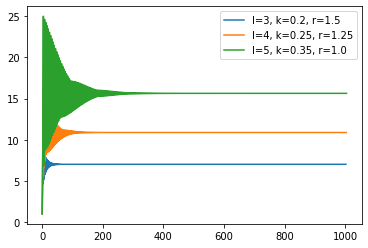

In [6]:
def start():
    """
    Base function.
    """
    tested = bool(int(input()))

    if tested:
        L, K, R, startX, n = get_params()
    else:
        L, K, R, startX, n = read_params()
    
    X = multisolver(L, K, R, startX, n)
    plotting(L, K, R, X)

start()
